In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as  xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.datasets import load_breast_cancer

In [2]:
dataset=load_breast_cancer()

In [3]:
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)
df['target']=dataset.target
df['diagnosis']=df['target'].map({0:'malignant',1:'benign'})
df.head(20)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,0,malignant
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,0,malignant
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,0,malignant
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,0,malignant
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,0,malignant
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,0,malignant


In [4]:
X=pd.DataFrame(dataset.data,columns=dataset.feature_names)
y=dataset.target
# print(y)
# print(X.head())

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
d_train=xg.DMatrix(X_train,label=y_train)
d_test=xg.DMatrix(X_test,label=y_test)

In [7]:
# 3. Set XGBoost parameters
params = {
    'objective': 'binary:logistic',  # for binary classification
    'eval_metric': 'logloss',        # evaluation metric
    'eta': 0.1,                     # learning rate
    'max_depth': 6,                 # maximum depth of a tree
    'subsample': 0.8,               # percentage of samples used per tree
    'colsample_bytree': 0.8,        # percentage of features used per tree
    'seed': 42,
    'nthread': 4                    # number of parallel threads
}

In [8]:
# 4. Train the model
num_rounds = 100
evals = [(d_train, 'train'), (d_test, 'test')]
model = xg.train(params, d_train, num_rounds, evals=evals, early_stopping_rounds=10, verbose_eval=10)

[0]	train-logloss:0.57898	test-logloss:0.58388
[10]	train-logloss:0.21226	test-logloss:0.24573
[20]	train-logloss:0.10389	test-logloss:0.15199
[30]	train-logloss:0.05938	test-logloss:0.12075
[40]	train-logloss:0.03955	test-logloss:0.11016
[50]	train-logloss:0.02878	test-logloss:0.10635
[60]	train-logloss:0.02282	test-logloss:0.10281
[70]	train-logloss:0.01902	test-logloss:0.09899
[79]	train-logloss:0.01661	test-logloss:0.10070


In [9]:
y_prd_prob=model.predict(d_test)
print(y_prd_prob)

[0.9920576  0.0029696  0.00344659 0.9983853  0.9988373  0.0022294
 0.00272242 0.07391255 0.21955638 0.997591   0.9782472  0.00592907
 0.9955272  0.03050423 0.99660385 0.004085   0.99750227 0.9985525
 0.99720794 0.00313269 0.98989666 0.9952667  0.00213335 0.9953086
 0.99212027 0.9905026  0.99817634 0.98587453 0.9985172  0.00197761
 0.9951638  0.99740964 0.9568458  0.9967109  0.9979226  0.99608237
 0.07636824 0.9893913  0.00244504 0.97992826 0.9986663  0.00258718
 0.99798274 0.998669   0.9004393  0.9880145  0.99469215 0.98501647
 0.9807757  0.9976204  0.00228872 0.00194513 0.76467174 0.92377573
 0.99843854 0.9973425  0.9981219  0.00265842 0.0979557  0.99811745
 0.9980482  0.00243198 0.00224191 0.97468215 0.9965706  0.9760935
 0.00236457 0.0033123  0.9942742  0.995158   0.00575645 0.00249454
 0.9981212  0.0028434  0.9918572  0.9892623  0.98016536 0.9055073
 0.99856204 0.98555875 0.00366734 0.99781716 0.6050206  0.0043502
 0.04554914 0.00812904 0.03052677 0.00358888 0.9945866  0.9962412
 0

In [10]:
y_prd=(y_prd_prob>0.5).astype(int)
print(y_prd)

[1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


In [11]:
print(classification_report(y_test,y_prd))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [12]:
print(confusion_matrix(y_test,y_prd))

[[40  3]
 [ 1 70]]


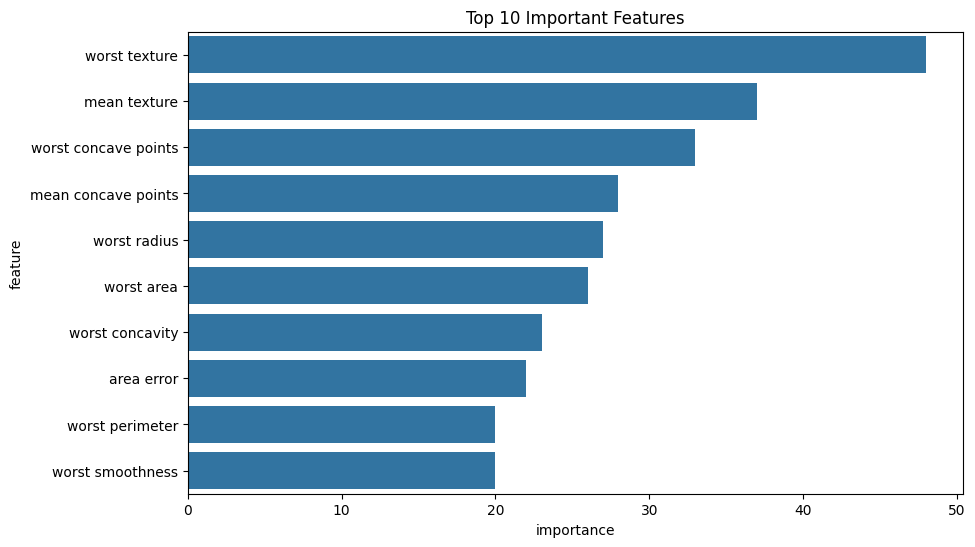

In [13]:
# 7. Feature importance
importance = model.get_score(importance_type='weight')
importance_df = pd.DataFrame({
    'feature': list(importance.keys()),
    'importance': list(importance.values())
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_df.head(10))
plt.title('Top 10 Important Features')
plt.show()